In [6]:
# "INFOF422 Statistical foundations of machine learning" course
# Python translation of R package gbcode 
# Author: G. Bontempi

#################################################################
# bv.py						                #
#################################################################
# Dataset D_N={x_i,y_i} :			
#	  y_i = beta_0 + beta_1x_i + w_i			#
#   with known  beta_0  and beta_1 and known w=Normal(0, sigma) 	#
#   						
# Visualization of bias and variance of the least square estimate 	#
#################################################################

import numpy as np
import matplotlib.pyplot as plt

# preliminary
# ============
np.random.seed(0)
X = np.arange(-10, 10.25, 0.25)  # fixed xi
beta0 = -1
beta1 = 1
sd_w = 3
N = len(X)
R = 50  # number of MC trials

beta_hat_1 = np.zeros(R)
beta_hat_0 = np.zeros(R)
var_hat_w = np.zeros(R)
Y_hat = np.empty((R, N))
Y_hat.fill(np.nan)
x_bar = np.mean(X)
S_xx = np.sum((X - x_bar) ** 2)

plt.figure(figsize=(10, 6))

for r in range(R):
    Y = beta0 + beta1 * X + np.random.normal(scale=sd_w, size=N)  # data generation
    y_bar = np.mean(Y)
    S_xy = np.sum((X - x_bar) * Y)
    
    beta_hat_1[r] = S_xy / S_xx
    beta_hat_0[r] = y_bar - beta_hat_1[r] * x_bar
    
    Y_hat[r, :] = beta_hat_0[r] + beta_hat_1[r] * X
    var_hat_w[r] = np.sum((Y - Y_hat[r, :]) ** 2) / (N - 2)
    
   

# After all trials
plt.clf()
plt.plot(X, beta0 + beta1 * X, color='green',
         label='True model', linewidth=3)
plt.scatter(X, Y, color='blue', s=10, label='Data points')

plt.plot(X, Y_hat.T, color='grey', linewidth=1)
plt.plot(X, np.mean(Y_hat, axis=0), color='red', linewidth=3, label='Mean prediction')
plt.title(f"beta0={beta0} beta1={beta1} sdw={sd_w}  N={N}")
plt.ylim(-10, 10)
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()


ModuleNotFoundError: No module named 'numpy'

In [3]:
## bv_mult.py
##"INFOF422 Statistical foundations of machine learning" course
# Python translation of R package gbcode 
# Author: G. Bontempi

import numpy as np
import matplotlib.pyplot as plt



n = 4  # number of input variables
p = n + 1
N = 100  # number of training data points
R = 10000
sd_w = 5

# Generate N x n array of uniform random variables between -20 and 20
X = np.random.uniform(-20, 20, size=(N, n))

# Add a column of ones for the intercept term
X = np.column_stack((np.ones(N), X))

# Randomly sample integers between 1 and 10 for beta
beta = np.random.randint(1, 11, size=p)  # test with different values

# Initialize arrays to store results
beta_hat = np.zeros((p, R))
var_hat_w = np.zeros(R)
Y_hat = np.empty((R, N))
Y_hat[:] = np.nan

# Precompute the pseudo-inverse of X^T X
XTX_pinv = np.linalg.pinv(X.T @ X)

for r in range(R):
    # Generate Y with noise
    noise = np.random.normal(0, sd_w, size=N)
    Y = X @ beta + noise

    # Estimate beta_hat using pseudo-inverse
    beta_hat[:, r] = XTX_pinv @ X.T @ Y

    # Predict Y_hat
    Y_hat[r, :] = X @ beta_hat[:, r]

    # Calculate residuals
    e = Y - Y_hat[r, :]

    # Estimate variance of w
    var_hat_w[r] = (e @ e) / (N - p)

# Plot histogram of var_hat_w
plt.hist(var_hat_w, bins='auto')
plt.title(f"Distribution of var_hat.w: var w= {sd_w**2}")
plt.xlabel("var_hat.w")
plt.ylabel("Frequency")
plt.show()

# Plot histograms for each beta_hat
for i in range(p):
    fig, ax = plt.subplots() 
    ax.hist(beta_hat[i, :], bins='auto')
    plt.title(f"Distribution of beta_hat.{i+1}: beta {i+1}= {beta[i]}")
    plt.xlabel(f"beta_hat.{i+1}")
    plt.ylabel("Frequency")
    display(fig)
    clear_output(wait=True)  # Clear the output
    
    plt.close(fig)  # Close the figure
    time.sleep(0.1)
    input(" ")

# Test unbiasedness and compare variancesfor a set of points
for i in range(5):
    # Calculate f(x_i)
    f_x_i = X[i, :] @ beta

    # Calculate mean of Y_hat for ith data point
    mean_Y_hat = np.mean(Y_hat[:, i])

    print(f"i= {i+1} E[yhat_i]= {mean_Y_hat} f(x_i)= {f_x_i}")

    # Calculate prediction variance analytically
    prediction_variance = (sd_w**2) * (X[i, :] @ XTX_pinv @ X[i, :].T)

    # Calculate empirical variance from Y_hat
    mc_value = np.var(Y_hat[:, i], ddof=1)

    print(f"i= {i+1} prediction variance= {prediction_variance} MC value= {mc_value}\n")


ModuleNotFoundError: No module named 'numpy'

## fpe.py

In [ ]:
# "INFOF422 Statistical foundations of machine learning" course
## fpe.py
# Python translation of the R package gbcode 
# Author: G. Bontempi

from IPython.display import display, clear_output
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import pinv
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import ipywidgets as widgets
import matplotlib
import time 

np.random.seed(0)

n = 3  # number of input variables
p = n + 1
p_max = 25
N = 35  # number of training data
x = np.sort(np.random.uniform(-1, 1, N))

X = np.ones((N, 1))
for j in range(1, p_max + 1):
    X = np.hstack((X, x.reshape(-1, 1) ** j))

xts = np.arange(-1, 1.01, 0.01)
Xts = np.ones((len(xts), 1))
for j in range(1, p_max + 1):
    Xts = np.hstack((Xts, xts.reshape(-1, 1) ** j))

beta = np.hstack(([1], np.arange(1, n + 1))).reshape(-1, 1)

sd_w = 0.5

f = X[:, :p] @ beta
Y = f.flatten() + np.random.normal(0, sd_w, N)

fts = Xts[:, :p] @ beta
Yts = fts.flatten() + np.random.normal(0, sd_w, len(fts))

R_emp = []
MISE = []
FPE = []
PSE = []
no_par = []
plt.figure()
for i in range(2, min(p_max, N - 1) + 1):
    
    XX = X[:, :i]
    invX = pinv(XX.T @ XX)
    beta_hat = invX @ XX.T @ Y
    Y_hat = XX @ beta_hat

    XXts = Xts[:, :i]
    Y_hats = XXts @ beta_hat
    no_par.append(i)

    e = Y - Y_hat
    R_emp.append((e.T @ e) / N)
    sde2hat = (e.T @ e) / (N - i)
    
    fig, ax = plt.subplots(figsize=(12, 10))  # Create figure and axes

    ax.plot(xts, fts, label='True function', color='green', linewidth=3)
    ax.scatter(x, Y, label='Data Points', color='blue')
    ax.plot(xts, Y_hats, label='Fitted function', color='red')
    plt.ylim(min(Y), max(Y))
    ax.legend()
    
    e_ts = Yts - Y_hats
    MISE.append((e_ts.T @ e_ts) / N)
    FPE.append(((1 + i / N) / (1 - i / N)) * (e.T @ e) / N)
    PSE.append((e.T @ e) / N + 2 * sde2hat * i / N)
    
    plt.title(f"degree={i-1}; MISE_emp={R_emp[i-2]:.4f}; FPE={FPE[i-2]:.2f}; PSE={PSE[i-2]:.3f}")
    
    display(fig)
    clear_output(wait=True)  # Clear the output
    
    plt.close(fig)  # Close the figure
    time.sleep(0.1)
    input(" ")
    
    plt.ioff()  # Disable interactive mode

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

axs[0, 0].plot(np.array(no_par) - 1, R_emp, label='Empirical risk')
axs[0, 0].set_xlabel("# parameters")
axs[0, 0].set_ylabel("Empirical risk")
axs[0, 0].set_title("Empirical risk")
axs[0, 0].set_xlim(2, 10)
axs[0, 0].set_ylim(0.05, 0.4)

axs[0, 1].plot(np.array(no_par) - 1, MISE, label='Generalization error')
axs[0, 1].set_xlabel("# parameters")
axs[0, 1].set_ylabel("Generalization error")
axs[0, 1].set_title("Generalization error")
axs[0, 1].set_xlim(2, 10)
axs[0, 1].set_ylim(1, 4)

axs[1, 0].plot(np.array(no_par) - 1, FPE, label='FPE')
axs[1, 0].set_xlabel("# parameters")
axs[1, 0].set_ylabel("FPE")
axs[1, 0].set_title("FPE")
axs[1, 0].set_xlim(2, 10)
axs[1, 0].set_ylim(0.05, 0.5)

axs[1, 1].plot(np.array(no_par) - 1, PSE, label='PSE')
axs[1, 1].set_xlabel("# parameters")
axs[1, 1].set_ylabel("PSE")
axs[1, 1].set_title("PSE")
axs[1, 1].set_xlim(2, 10)
axs[1, 1].set_ylim(0.05, 0.5)

plt.tight_layout()
plt.show()
plt.close()

print(f"which.min(R.emp)={np.argmin(R_emp) + 1}")
print(f"which.min(MISE)={np.argmin(MISE) + 1}")
print(f"which.min(FPE)={np.argmin(FPE) + 1}")
print(f"which.min(PSE)={np.argmin(PSE) + 1}")

    

## lin_rls.py

In [ ]:
# "INFOF422 Statistical foundations of machine learning" course
# lin_rls.py
# Original Author: G. Bontempi
# Translated to Python

import numpy as np
import matplotlib.pyplot as plt

def rls(x, y, t, P, mu=1):
    x = np.array(x).reshape(-1, 1)
    P_new = (P - (P @ x @ x.T @ P) / float(1 + x.T @ P @ x)) / mu
    ga = P_new @ x
    epsi = y - float(x.T @ t)
    t_new = t + ga * epsi
    return t_new, P_new

# Generate data
X = np.arange(-np.pi, np.pi, 0.02)
N = len(X)
y = np.sin(X) + 0.1 * np.random.normal(size=N)

# Initialize parameters
n = 1
t = np.zeros((2, 1))
P = 500 * np.eye(n + 1)
mu = 0.97

#plt.ion()  # Turn on interactive mode

for i in range(N):
    # Create input vector [1, X[i]]
    x_input = np.array([[1], [X[i]]])
    
    # RLS update
    t, P = rls(x_input, y[i], t, P, mu)
    
    if i % 10 == 0:
        fig, ax = plt.subplots(figsize=(8, 8))  # Create figure and axes
        #plt.clf()  # Clear the current figure
        ax.plot(X[:i+1], y[:i+1], 'b.')
        plt.xlim(-4, 4)
        plt.ylim(-2, 2)
        plt.title(f"RLS Forgetting factor mu: {mu}")
        plt.xlabel("x")
        plt.ylabel("y")
        
        # Generate prediction line
        X_plot = X[:i+1]
        X_augmented = np.column_stack((np.ones_like(X_plot), X_plot))
        y_pred = X_augmented @ t
        ax.plot(X_plot, y_pred, 'r-')
        
        display(fig)
        clear_output(wait=True)  # Clear the output
    
        plt.close(fig)  # Close the figure
        time.sleep(0.5)
        #input(" ")

#plt.tight_layout()
#plt.show()


## biasvar_vis.py


In [ ]:
# "INFOF422 Statistical foundations of machine learning" course
# biasvar_vis.py
# Author: G. Bontempi

# Visualization of bias variance tradeoff for a set of polynomial fittings

import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Define the function f(x, ord) = 1 + x + x^2 + ... + x^ord
def f(x, ord):
    f_val = 1
    for i in range(1, ord + 1):
        f_val += x ** i
    return f_val



# Set random seed
np.random.seed(1)

n = 1
N = 20

x = np.linspace(-2, 2, N)
N = len(x)
sd_w = 0.75
O = 3
Y = f(x, ord=O) + np.random.normal(0, sd_w, size=N)
data_tr = np.column_stack((Y, x))

MaxDegree = 15 ## max degree of fitting polynomial

Remp = np.zeros(MaxDegree)  ## Empirical Risk
MSE_loo = np.zeros(MaxDegree) ## Leave-One-Out
x_ts = np.linspace(-2, 2, 200)

B2 = np.zeros(MaxDegree)  ## Squared Bias
V = np.zeros(MaxDegree)  ## Variance
PR = np.zeros(MaxDegree)
FPE = np.zeros(MaxDegree) ## FPE term



for r in range(1, MaxDegree + 1):
    X = np.column_stack([x ** ord for ord in range(1, r + 1)])
    X_ts = np.column_stack([x_ts ** ord for ord in range(1, r + 1)])
    p = r + 1
    Pr = []
    fig, ax = plt.subplots(figsize=(8, 8)) 
    for rr in range(1, 501):
        np.random.seed(rr)
        Y = f(x, ord=O) + np.random.normal(0, sd_w, size=N)
        DN = pd.DataFrame(X, columns=[f'x^{i}' for i in range(1, r + 1)])
        DN['Y'] = Y

        # Add constant term for intercept
        X_with_const = sm.add_constant(X)
        model = sm.OLS(Y, X_with_const).fit()
        sd_w_hat = np.sqrt(np.sum(model.resid ** 2) / (N - p))

        if rr == 1:
            Remp[r - 1] = np.mean(model.resid ** 2)
            PR[r - 1] = PRESS(model)
            FPE[r - 1] = Remp[r - 1] + 2 * sd_w_hat * p / N

        Y_ts = f(x_ts, ord=O)
        data_ts = pd.DataFrame(X_ts, columns=[f'x^{i}' for i in range(1, r + 1)])
        data_ts['Y'] = Y_ts

        if rr == 1:
            ax.plot(x_ts, Y_ts, label='True Function', color='blue', linewidth=2)
            ax.scatter(x, Y, label='Data Points', color='black')

        pr = model.predict(sm.add_constant(X_ts))
        Pr.append(pr)
        ax.plot(x_ts, pr, color='red', alpha=0.1)

    Pr = np.array(Pr).T
    mean_pr = np.mean(Pr, axis=1)
    ax.plot(x_ts, Y_ts, color='blue', linewidth=2)
    ax.plot(x_ts, mean_pr, color='green', linewidth=2, label='Mean Prediction')

    bias = np.round(np.mean(np.abs(Y_ts - mean_pr)), 2)
    variance = np.round(np.mean(np.var(Pr, axis=1)), 2)
    Remp_val = np.round(Remp[r - 1], 3)

    plt.title(f"N={N}; degree={r}\n Bias={bias}; Var={variance}; Emp risk={Remp_val}")
    B2[r - 1] = np.mean((Y_ts - mean_pr) ** 2)
    V[r - 1] = np.mean(np.var(Pr, axis=1))

    plt.legend()
    display(fig)
    clear_output(wait=True)  # Clear the output
    
    plt.close(fig)  # Close the figure
    time.sleep(1) 
    #input()
    

plt.figure(figsize=(10, 6))
mR = MaxDegree
degrees = np.arange(1, mR + 1)

plt.plot(degrees[:R], Remp[:R], label='Remp', color='yellow', linewidth=3)
plt.plot(degrees[:R], B2[:R] + V[:R], label='MSE', color='black', linewidth=3)
plt.plot(degrees[:R], B2[:R], label='Bias', color='green', linewidth=3)
plt.plot(degrees[:R], V[:R], label='Variance', color='red', linewidth=3)
plt.plot(degrees[:R], PR[:R], label='LOO', color='orange', linewidth=3)
plt.plot(degrees[:R], FPE[:R], label='FPE', color='cyan', linewidth=3)

plt.title("Bias-variance tradeoff")
plt.xlabel("Degree")
plt.ylabel("Error Metrics")
plt.legend(loc='upper right')
plt.ylim(0, 3)
plt.show()


In [ ]:
# "INFOF422 Statistical foundations of machine learning" course
# R package gbcode 
# Author: G. Bontempi
# discri2.py
# This script shows the limitation of a linear discriminant in the case of multimodal class conditional distributions

import numpy as np
from scipy.stats import multivariate_normal as mvn
import matplotlib.pyplot as plt

def norm(x):
    return np.sqrt(np.sum(x**2))

N = 500
p1 = 0.4
w1 = 0.5
w2 = 0.5

mu11 = np.array([1, 1])
mu12 = np.array([-2.1, -1.3])

Sigma1 = 0.5 * np.eye(2)
N1 = int(round(p1 * N))

samples1 = mvn.rvs(mean=mu11, cov=Sigma1, size=int(round(w1 * N1)))
samples2 = mvn.rvs(mean=mu12, cov=Sigma1, size=int(round(w2 * N1)))
X = np.vstack((samples1, samples2))

N0 = N - N1
mu0 = np.array([0, 0])
Sigma0 = 0.5 * np.eye(2)
X0 = mvn.rvs(mean=mu0, cov=Sigma0, size=N0)
X = np.vstack((X, X0))

Y = np.zeros(N)
Y[:N1] = 1

Phat1 = N1 / N
Phat0 = N0 / N

fig, ax = plt.subplots()
ax.scatter(X[:N1, 0], X[:N1, 1], color="green", label="Class 1", s=8)
ax.scatter(X[N1:, 0], X[N1:, 1], color="red", label="Class 0",s=8)
ax.set_xlabel("x1")
ax.set_ylabel("x2")

muhat1 = X[:N1].mean(axis=0)
muhat0 = X[N1:].mean(axis=0)
Xd = np.arange(-10, 11)
sigma2 = np.mean(np.var(X, axis=0))

w = muhat1 - muhat0
x0 = 0.5 * (muhat1 + muhat0) - (sigma2 / (norm(w)**2)) * w * np.log(Phat1 / Phat0)

m = -w[0] / w[1]
intc = (w[0] / w[1]) * x0[0] + x0[1]

# ax.plot(Xd, m * Xd + intc)
ax.plot([-10, 10], [m * -10 + intc, m * 10 + intc], label="Decision Boundary")
# plt.plot([muhat1[0], muhat2[0]], [muhat1[1], muhat2[1]])
ax.scatter(x0[0], x0[1], color="blue", label="x0")
plt.ylim([-4,4])
plt.xlim([-5,5])
ax.legend()
plt.show()


In [ ]:
# "INFOF422 Statistical foundations of machine learning" course
# lin_uni.py
# Example of univariate linear regression

import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(0)

# Generate data
N = 30
sigma_w = 0.5
X = np.random.normal(size=N)
W = np.random.normal(scale=0.5, size=N)

beta0 = 1/2
beta1 = 1.2
Y = beta0 + beta1 * X + W

# Create scatter plot
plt.figure()
plt.scatter(X, Y)

# Calculate means
xhat = np.mean(X)
yhat = np.mean(Y)

# Calculate sums for least squares
Sxy = np.sum((X - xhat) * Y)
Sxx = np.sum((X - xhat) * X)

# Univariate least-squares
betahat1 = Sxy / Sxx
betahat0 = yhat - betahat1 * xhat

# Plot regression line
X_sorted = np.sort(X)
plt.plot(X_sorted, betahat0 + X_sorted * betahat1, 'r-')
plt.show()


In [ ]:
# "INFOF422 Statistical foundations of machine learning" course
# ee.py
# Monte Carlo computation of Expected Empirical Error and MISE in the linear case
# Author: G. Bontempi

import numpy as np



X = np.arange(-10, 10.1, 0.1)

beta_0 = -1
beta_1 = 1.4
N = len(X)
R = 10000  # number of MC trials
sd_w = 4
p = 2
beta_hat_1 = np.zeros(R)
beta_hat_0 = np.zeros(R)
var_hat_w = np.zeros(R)
EE = np.zeros(R)
MISE = np.zeros(R)
Y_hat = np.empty((R, N))

for r in range(R):
    Y = beta_0 + beta_1 * X + np.random.normal(0, sd_w, size=N)
    x_hat = np.mean(X)
    y_hat = np.mean(Y)
    S_xy = np.sum((X - x_hat) * Y)
    S_xx = np.sum((X - x_hat) ** 2)
    
    beta_hat_1[r] = S_xy / S_xx
    beta_hat_0[r] = y_hat - beta_hat_1[r] * x_hat
    
    Y_hat[r, :] = beta_hat_0[r] + beta_hat_1[r] * X
    
    EE[r] = np.mean((Y - Y_hat[r, :]) ** 2)  # empirical error
    var_hat_w[r] = np.sum((Y - Y_hat[r, :]) ** 2) / (N - 2)
    
    Yts = beta_0 + beta_1 * X + np.random.normal(0, sd_w, size=N)  # test set
    MISE[r] = np.mean((Yts - Y_hat[r, :]) ** 2)

MISEemp_th = (1 - p / N) * sd_w ** 2

print(f"Expected empirical MISE: analytical= {MISEemp_th}; simulated (MC) = {np.mean(EE)}")

MISE_th = (1 + p / N) * sd_w ** 2

print(f"MISE: analytical = {MISE_th}; simulated (MC) = {np.mean(MISE)}")


In [ ]:
import numpy as np
from scipy.stats import norm

# "INFOF422 Statistical foundations of machine learning" course
# Python translation of R package gbcode 
# Author: G. Bontempi
# mc_condentr.py
# This script uses Monte Carlo to compute entropy, conditional entropy and mutual information  
# and compare such approximations to the analytical values (Gaussian case)

r = 1000
r2 = 500
sdw = 0.1

def f(x1, x2):
    return np.sin(x1) * x2

# Y = x1 + x2 + w
# X1 ~ U(-1,1), X2 ~ U(-1,1) W ~ N(0, sdw^2)
# p(Y|x1, x2) = N(y - x1 - x2, 0, 0.1^2)

# H(Y|x1)
# p(Y|x1) = ∫x2 p(Y|x1, x2)
hy1 = []
for i in range(1, r + 1):
    np.random.seed(i)
    x1 = np.random.uniform(-1, 1)
    x2 = np.random.uniform(-1, 1)
    y = f(x1, x2) + np.random.normal(0, sdw)
    pY1 = []
    for j in range(1, r2 + 1):
        x2_new = np.random.uniform(-1, 1)
        pY1.append(norm.pdf(y - f(x1, x2_new), 0, sdw))
    hy1.append(-np.log(np.mean(pY1)))

# H(Y|x2)
# p(Y|x2) = ∫x1 p(Y|x1, x2)
hy2 = []
for i in range(1, r + 1):
    np.random.seed(i)
    x1 = np.random.uniform(-1, 1)
    x2 = np.random.uniform(-1, 1)
    y = f(x1, x2) + np.random.normal(0, sdw)
    pY2 = []
    for j in range(1, r2 + 1):
        x1_new = np.random.uniform(-1, 1)
        pY2.append(norm.pdf(y - f(x1_new, x2), 0, sdw))
    hy2.append(-np.log(np.mean(pY2)))

# H(Y|x1, x2)
# p(Y|x1, x2)
hy12 = []
for i in range(1, r + 1):
    np.random.seed(i)
    x1 = np.random.uniform(-1, 1)
    x2 = np.random.uniform(-1, 1)
    y = f(x1, x2) + np.random.normal(0, sdw)
    hy12.append(-norm.logpdf(y - f(x1, x2), 0, sdw))

# H(W)
hw = []
for i in range(1, r + 1):
    np.random.seed(i)
    w = np.random.normal(0, sdw)
    hw.append(-norm.logpdf(w, 0, sdw))

# H(Y)
hy = []
for i in range(1, r + 1):
    np.random.seed(i)
    w = np.random.normal(0, sdw)
    x1 = np.random.uniform(-1, 1)
    x2 = np.random.uniform(-1, 1)
    y = f(x1, x2) + np.random.normal(0, sdw)
    pY = []
    for j in range(1, r2 + 1):
        x2_new = np.random.uniform(-1, 1)
        x1_new = np.random.uniform(-1, 1)
        pY.append(norm.pdf(y - f(x1_new, x2_new), 0, sdw))
    hy.append(-np.log(np.mean(pY)))

print("\n --- \n MC H(Y|X1)=", np.mean(hy1),
      "MC H(Y|X2)=", np.mean(hy2),
      "MC H(Y|X1,X2)=", np.mean(hy12),
      " \n MC H(W)=", np.mean(hw),
      "analytical H(W)=", 0.5*(1 + np.log(2 * np.pi * sdw**2)),
      " MC H(Y)=", np.mean(hy))

print("\n--\n MC I(Y;X1)=", np.mean(hy) - np.mean(hy1),
      " MC I(Y;X2)=", np.mean(hy) - np.mean(hy2),
      " MC I(Y;X1,X2)=", np.mean(hy) - np.mean(hy12),
      "analytical I(Y;X1,X2)=", np.mean(hy) - 0.5*(1 + np.log(2 * np.pi * sdw**2)),
      "\n")


In [ ]:
# "INFOF422 Statistical foundations of machine learning" course
# Python translation of R package gbcode 
# mc_condentr2.R
# Author: G. Bontempi
# Monte Carlo estimation of conditional entropies and informations in a regression problem with three independent inputs and a Normal noise

import numpy as np
from scipy.stats import norm


# Initialize parameters
R = 200
R2 = 100

sdw = 0.2

def f(x1, x2, x3):
    return np.sin(x1) * x2 + np.log(np.abs(x1 * x2)) + x3

# Y = f(x1, x2, x3) + w
# X1 ~ U(-1,1), X2 ~ U(-1,1), X3 ~ U(-1,1), W ~ N(0, sdw^2)
# p(Y|x1,x2,x3) = N(y - f(x1,x2,x3), 0, sdw^2)

# H(Y|X1)
# p(Y|x1) = ∫ p(Y|x1,x2,x3) p(x2,x3) dx2 dx3 
HY1 = []
for r in range(1, R + 1):
    np.random.seed(r)
    x1 = np.random.uniform(-1, 1)
    x2 = np.random.uniform(-1, 1)
    x3 = np.random.uniform(-1, 1)
    y = f(x1, x2, x3) + np.random.normal(0, sdw)
    pY1 = []
    for r1 in range(1, R2 + 1):
        x2_sample = np.random.uniform(-1, 1)
        x3_sample = np.random.uniform(-1, 1)
        p = norm.pdf(y - f(x1, x2_sample, x3_sample), loc=0, scale=sdw)
        pY1.append(p)
    HY1.append(-np.log(np.mean(pY1)))

# H(Y|X2)
# p(Y|x2) = ∫ p(Y|x1,x2,x3) p(x1,x3) dx1 dx3 
HY2 = []
for r in range(1, R + 1):
    np.random.seed(r)
    x1 = np.random.uniform(-1, 1)
    x2 = np.random.uniform(-1, 1)
    x3 = np.random.uniform(-1, 1)
    y = f(x1, x2, x3) + np.random.normal(0, sdw)
    pY2 = []
    for r1 in range(1, R2 + 1):
        x1_sample = np.random.uniform(-1, 1)
        x3_sample = np.random.uniform(-1, 1)
        p = norm.pdf(y - f(x1_sample, x2, x3_sample), loc=0, scale=sdw)
        pY2.append(p)
    HY2.append(-np.log(np.mean(pY2)))

# H(Y|X3)
# p(Y|x3) = ∫ p(Y|x1,x2,x3) p(x1,x2) dx1 dx2 
HY3 = []
for r in range(1, R + 1):
    np.random.seed(r)
    x1 = np.random.uniform(-1, 1)
    x2 = np.random.uniform(-1, 1)
    x3 = np.random.uniform(-1, 1)
    y = f(x1, x2, x3) + np.random.normal(0, sdw)
    pY3 = []
    for r1 in range(1, R2 + 1):
        x1_sample = np.random.uniform(-1, 1)
        x2_sample = np.random.uniform(-1, 1)
        p = norm.pdf(y - f(x1_sample, x2_sample, x3), loc=0, scale=sdw)
        pY3.append(p)
    HY3.append(-np.log(np.mean(pY3)))

# H(Y|X1,X2)
# p(Y|x1,x2) = ∫ p(Y|x1,x2,x3) p(x3) dx3 
HY12 = []
for r in range(1, R + 1):
    np.random.seed(r)
    x1 = np.random.uniform(-1, 1)
    x2 = np.random.uniform(-1, 1)
    x3 = np.random.uniform(-1, 1)
    y = f(x1, x2, x3) + np.random.normal(0, sdw)
    pY12 = []
    for r1 in range(1, R2 + 1):
        x3_sample = np.random.uniform(-1, 1)
        p = norm.pdf(y - f(x1, x2, x3_sample), loc=0, scale=sdw)
        pY12.append(p)
    HY12.append(-np.log(np.mean(pY12)))

# H(Y|X1,X3)
# p(Y|x1, x3) = ∫ p(Y|x1,x2,x3) p(x2) dx2
HY13 = []
for r in range(1, R + 1):
    np.random.seed(r)
    x1 = np.random.uniform(-1, 1)
    x2 = np.random.uniform(-1, 1)
    x3 = np.random.uniform(-1, 1)
    y = f(x1, x2, x3) + np.random.normal(0, sdw)
    pY13 = []
    for r1 in range(1, R2 + 1):
        x2_sample = np.random.uniform(-1, 1)
        p = norm.pdf(y - f(x1, x2_sample, x3), loc=0, scale=sdw)
        pY13.append(p)
    HY13.append(-np.log(np.mean(pY13)))

# H(Y|X2,X3)
# p(Y|x2, x3) = ∫ p(Y|x1,x2,x3) p(x1) dx1
HY23 = []
for r in range(1, R + 1):
    np.random.seed(r)
    x1 = np.random.uniform(-1, 1)
    x2 = np.random.uniform(-1, 1)
    x3 = np.random.uniform(-1, 1)
    y = f(x1, x2, x3) + np.random.normal(0, sdw)
    pY23 = []
    for r1 in range(1, R2 + 1):
        x1_sample = np.random.uniform(-1, 1)
        p = norm.pdf(y - f(x1_sample, x2, x3), loc=0, scale=sdw)
        pY23.append(p)
    HY23.append(-np.log(np.mean(pY23)))

HW = []
for r in range(1, R + 1):
    np.random.seed(r)
    w = np.random.normal(0, sdw)
    HW.append(-norm.logpdf(w, loc=0, scale=sdw))

# Marginal entropy 
# p(Y) = ∫ p(Y|x1,x2,x3) p(x1)p(x2)p(x3) dx1 dx2 dx3
HY = []
for r in range(1, R + 1):
    np.random.seed(r)
    w = np.random.normal(0, sdw)
    x1 = np.random.uniform(-1, 1)
    x2 = np.random.uniform(-1, 1)
    x3 = np.random.uniform(-1, 1)
    y = f(x1, x2, x3) + np.random.normal(0, sdw)
    pY = []
    for r1 in range(1, R2 + 1):
        x1_sample = np.random.uniform(-1, 1)
        x2_sample = np.random.uniform(-1, 1)
        x3_sample = np.random.uniform(-1, 1)
        p = norm.pdf(y - f(x1_sample, x2_sample, x3_sample), loc=0, scale=sdw)
        pY.append(p)
    HY.append(-np.log(np.mean(pY)))

print(f"MC approximations: H(Y|X1)={np.mean(HY1)} H(Y|X2)={np.mean(HY2)} H(Y|X3)={np.mean(HY3)}"
      f"\n H(Y|X1,X2)={np.mean(HY12)}"
      f" H(Y|X1,X3)={np.mean(HY13)} H(Y|X2,X3)={np.mean(HY23)}"
      f" \n MC H(W)={np.mean(HW)}"
      f" analytical H(W)={0.5 * (1 + np.log(2 * np.pi * sdw**2))}"
      f" H(Y)={np.mean(HY)}")

print("\n--\n MC approximations: I(Y;X1)={0} I(Y;X2)={1} I(Y;X3)={2}"
      f" \n I(Y;X1,X2)={np.mean(HY) - np.mean(HY12)}"
      f" I(Y;X1,X3)={np.mean(HY) - np.mean(HY13)}"
      f" I(Y;X2,X3)={np.mean(HY) - np.mean(HY23)}"
      f"\n max I=H(Y)-H(W) {np.mean(HY) - 0.5 * (1 + np.log(2 * np.pi * sdw**2))}"
      f"\n")


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


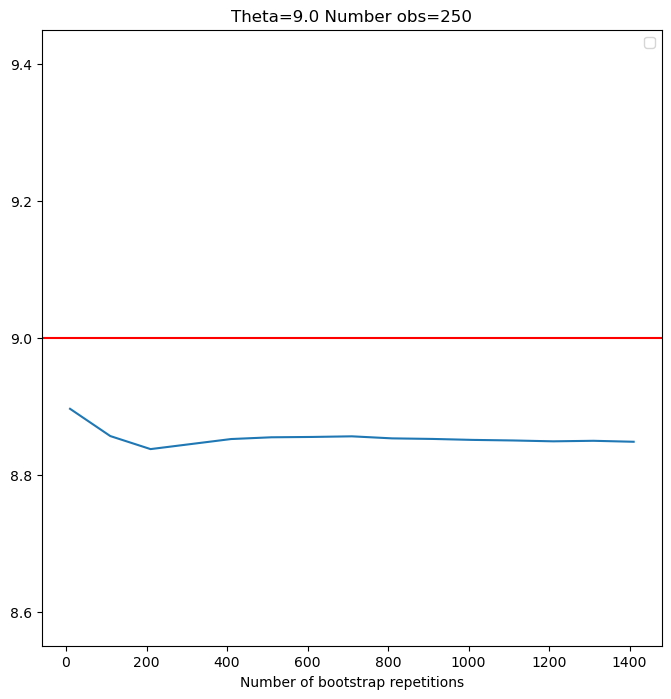

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


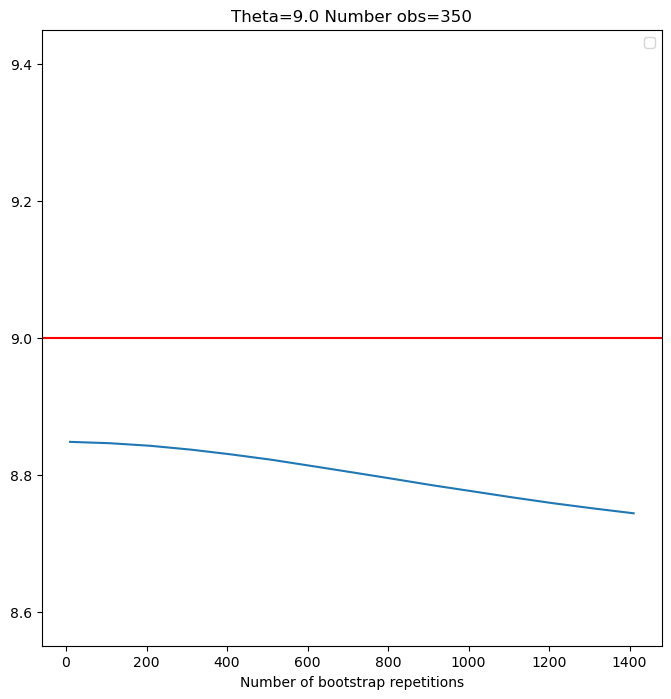

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


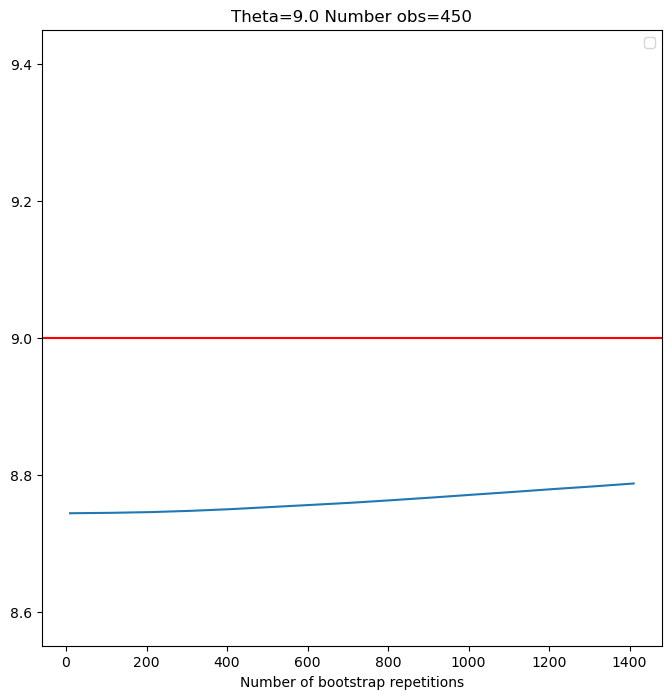

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


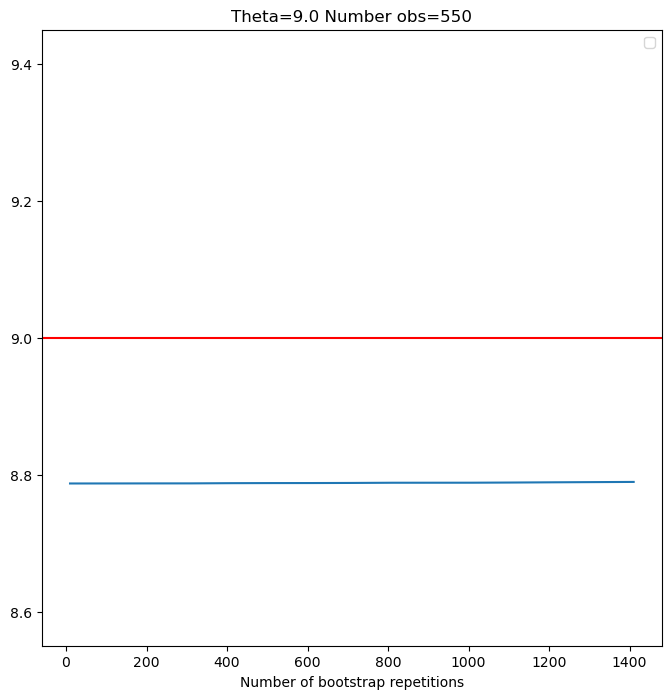

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


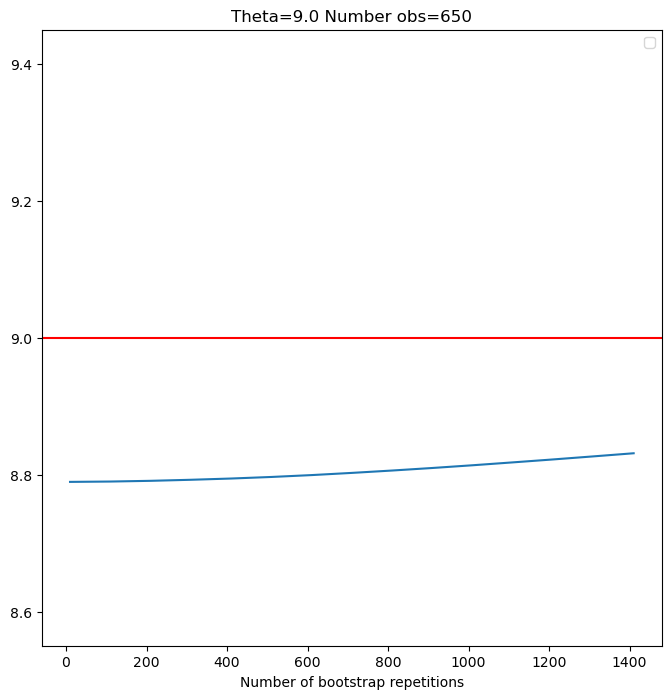

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


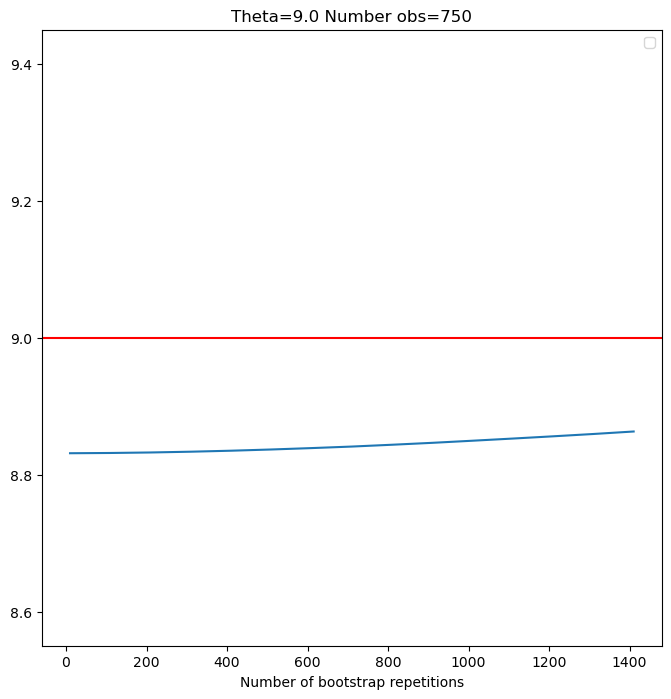

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


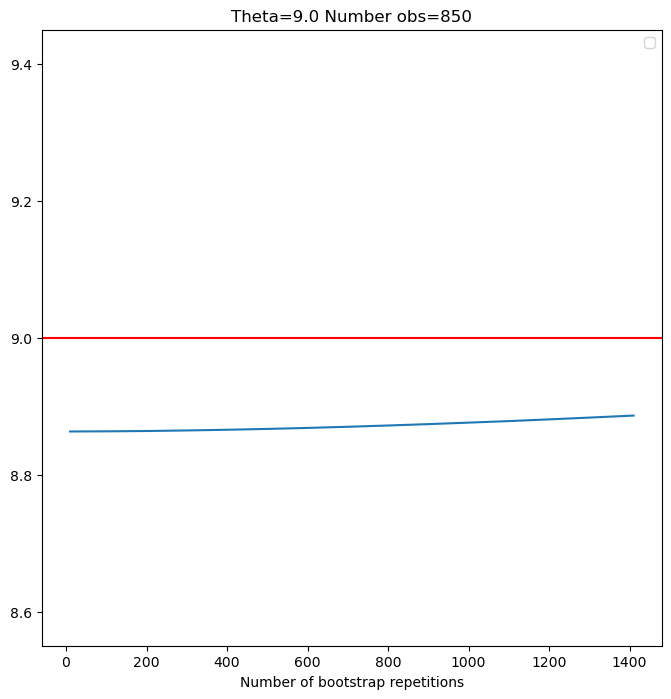

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


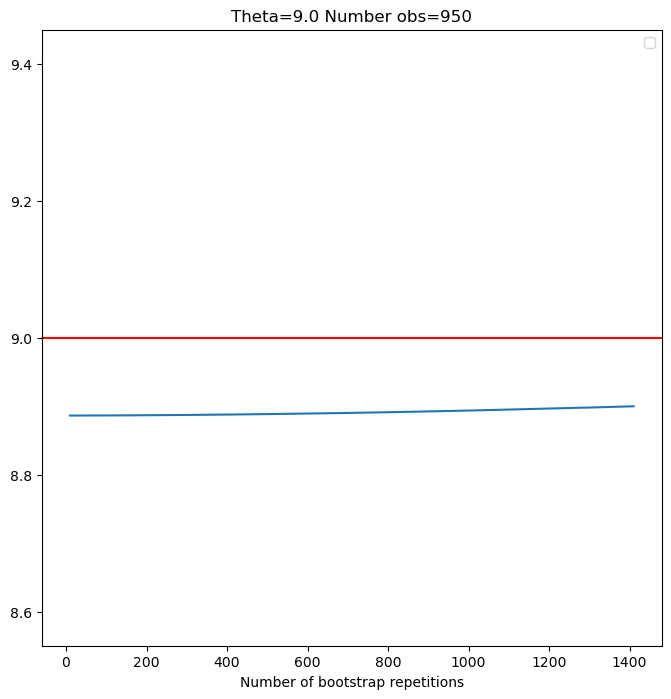

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


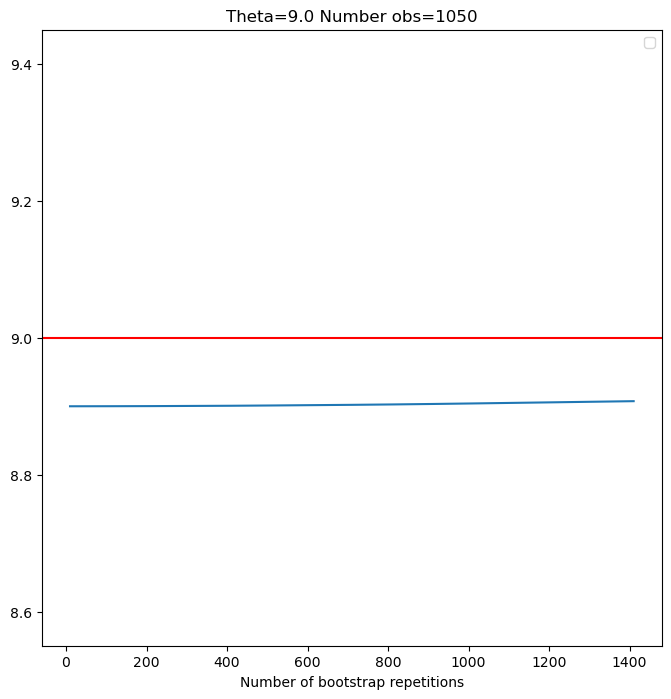

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


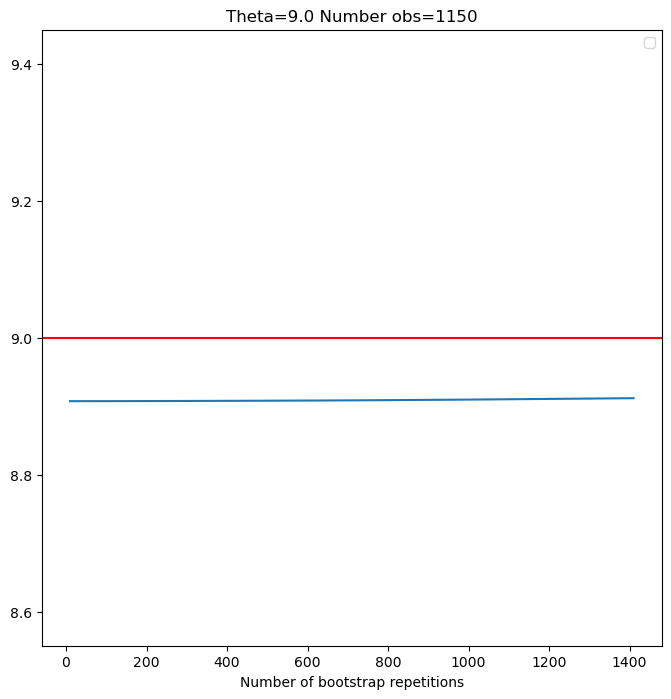

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


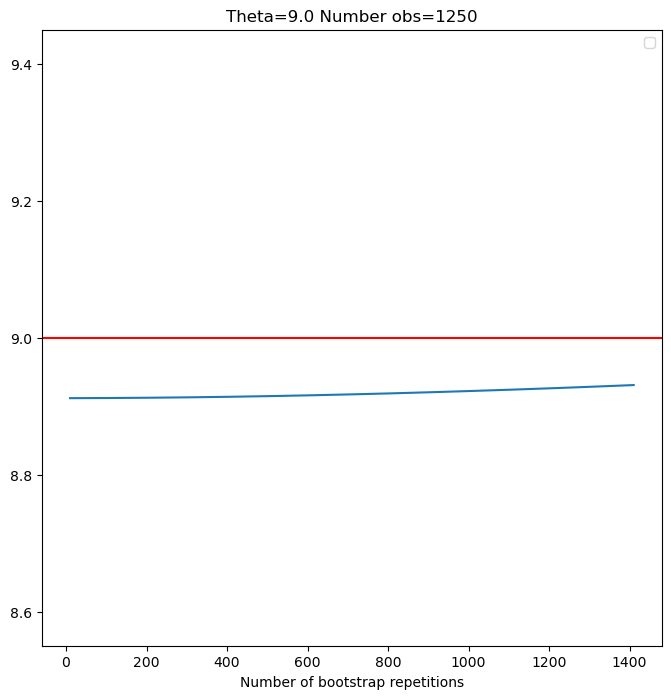

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


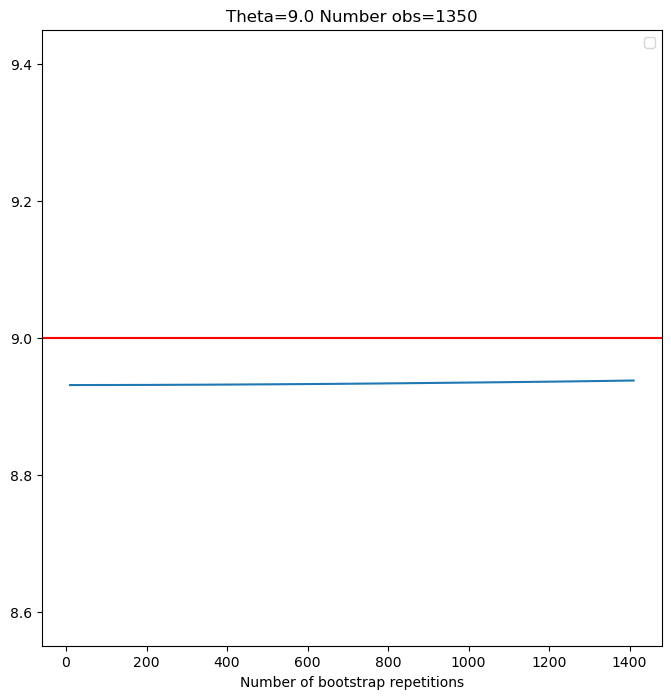

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


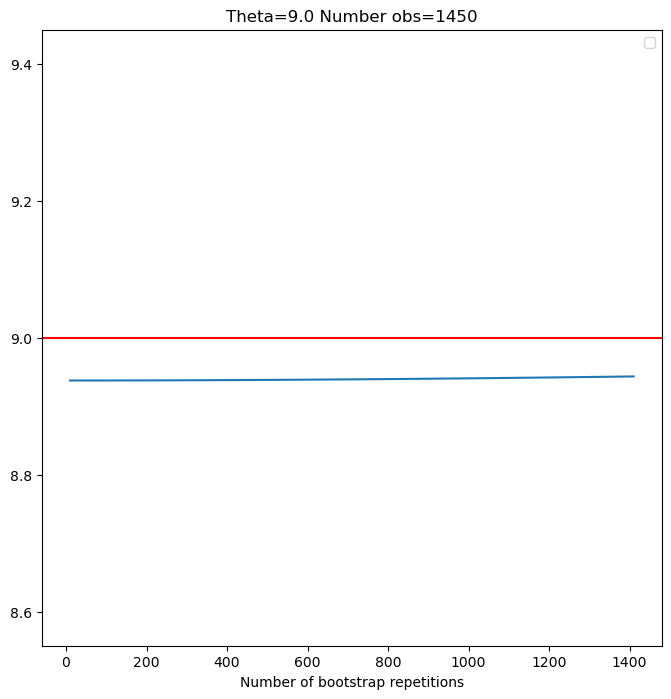

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


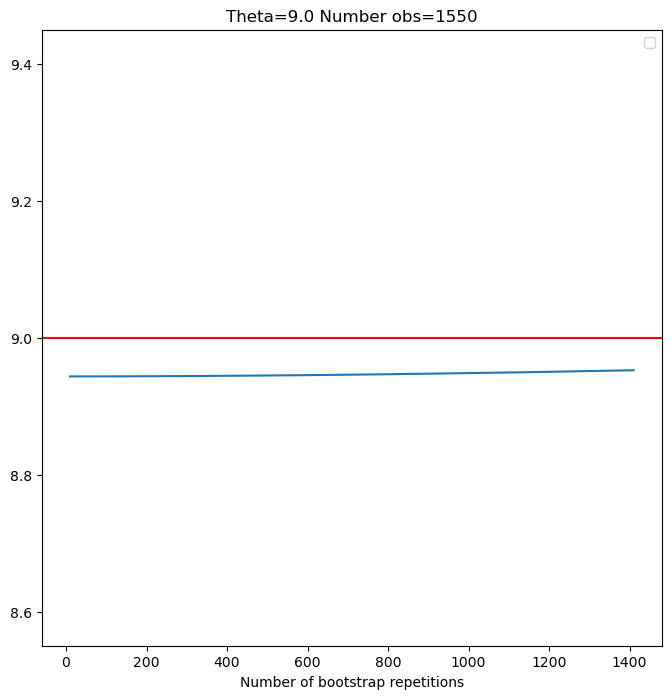

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


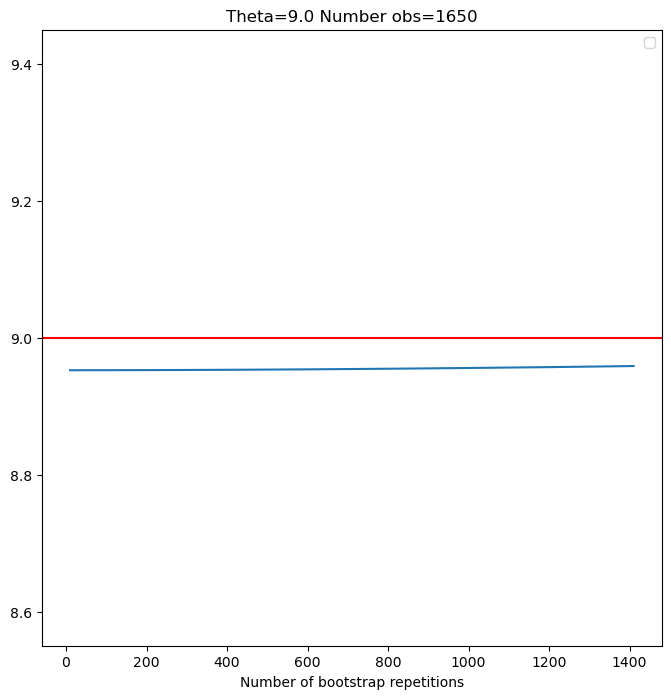

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


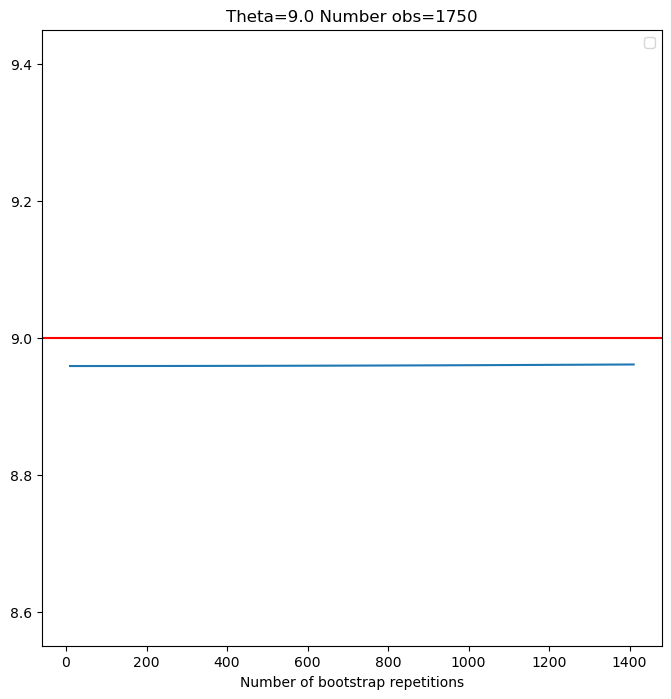

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


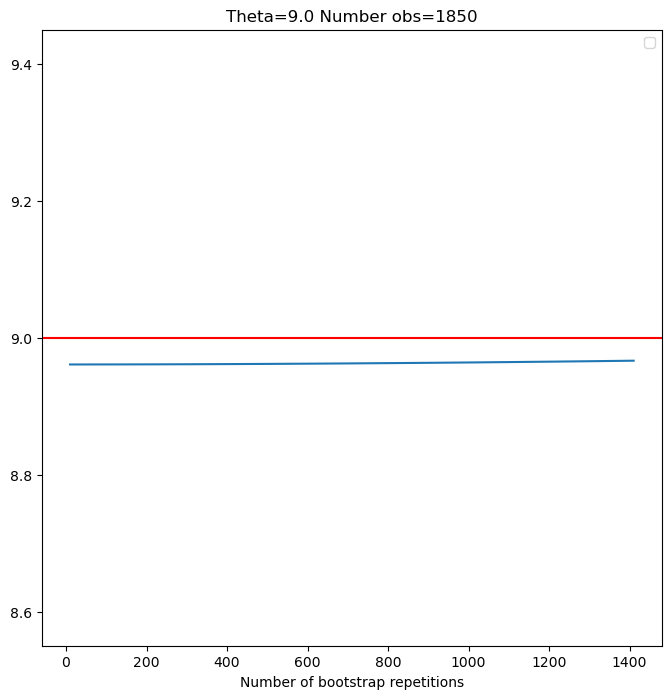

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


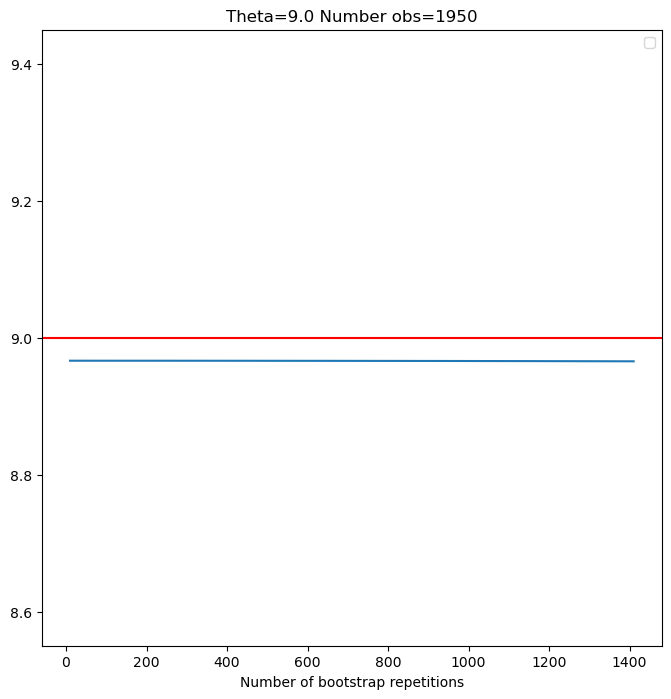

In [1]:
# "INFOF422 Statistical foundations of machine learning" course
# Python version of gbcode package
# boot.py
# Bootstrap estimation of the 90% quantile of a uniform distribution between 0 and 10
# The simulation shows the impact of the number of observations (estimation error) and of the number of bootstrap replications (simulation error)
# Author: G. Bontempi

import numpy as np
import time
import matplotlib.pyplot as plt

np.random.seed(0)

lower = 0
upper = 10
p = 0.9
theta = lower + p * (upper - lower)

Qb = []
for N in range(250, 2001, 100):
    Thetahat = []
    DN = np.random.uniform(lower, upper, N)
    sB = range(10, 1501, 100)
    for B in sB:
        for b in range(B):
            Db = np.random.choice(DN, size=N, replace=True)
            Qb.append(np.quantile(Db, p))
        #   plt.hist(Qb)
        #   plt.title(f"# obs.={N} # bootstrap samples={B}")
        thetahat = np.mean(Qb)
        Thetahat.append(thetahat)
        # print(f"# obs.={N}, # bootstrap samples={B}, estim={thetahat}, %err={abs((theta - thetahat)/theta)}")
    
    fig, ax = plt.subplots(figsize=(8, 8)) 
    ax.plot(sB, Thetahat)
    ax.axhline(y=theta, color='r')
    plt.title(f"Theta={theta} Number obs={N}")
    plt.xlabel("Number of bootstrap repetitions")
    plt.ylim(theta * 0.95, theta * 1.05)
    plt.legend()
    display(fig)
    #clear_output(wait=True)  # Clear the output
    
    plt.close(fig)  # Close the figure
    time.sleep(1)
    #input()
    #plt.show()


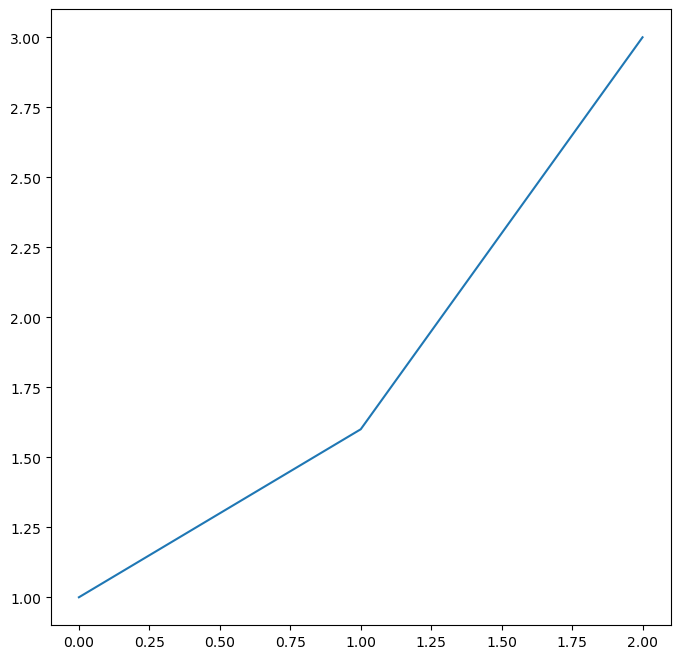

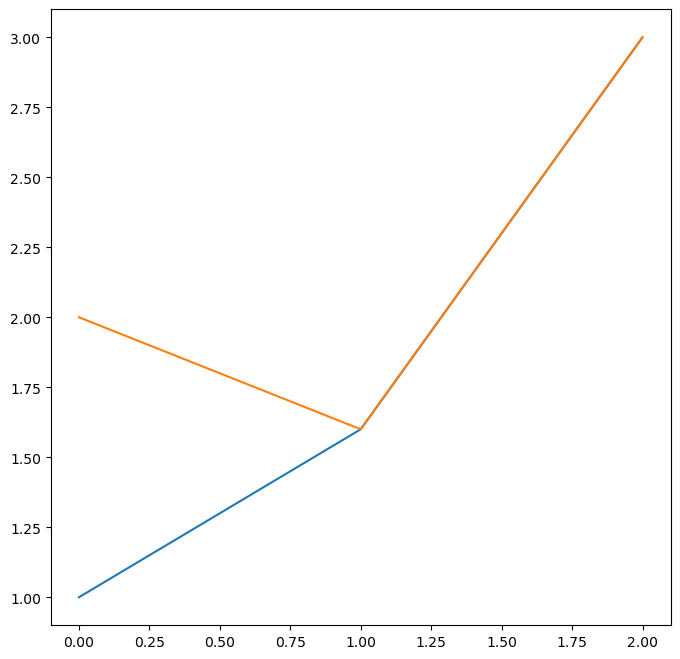

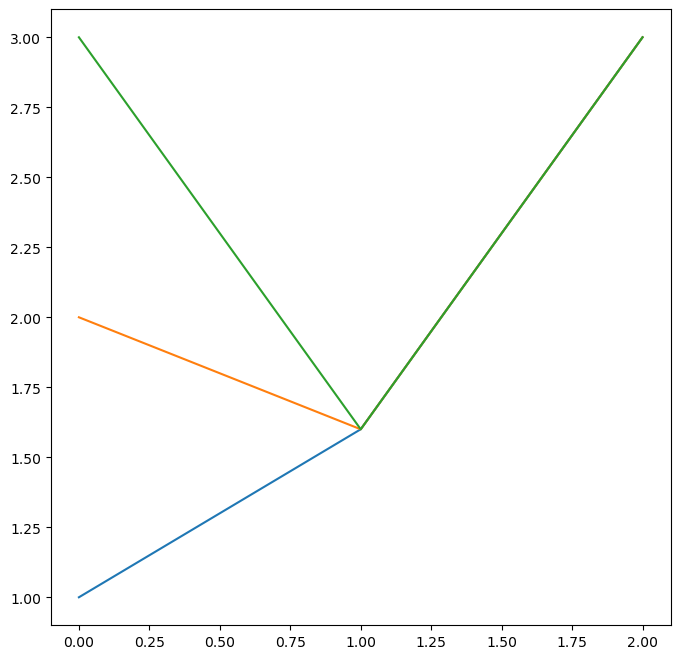

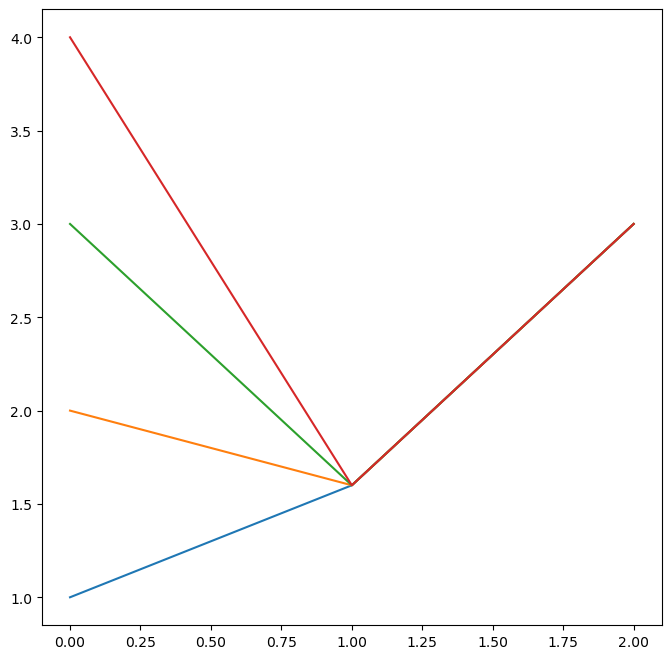

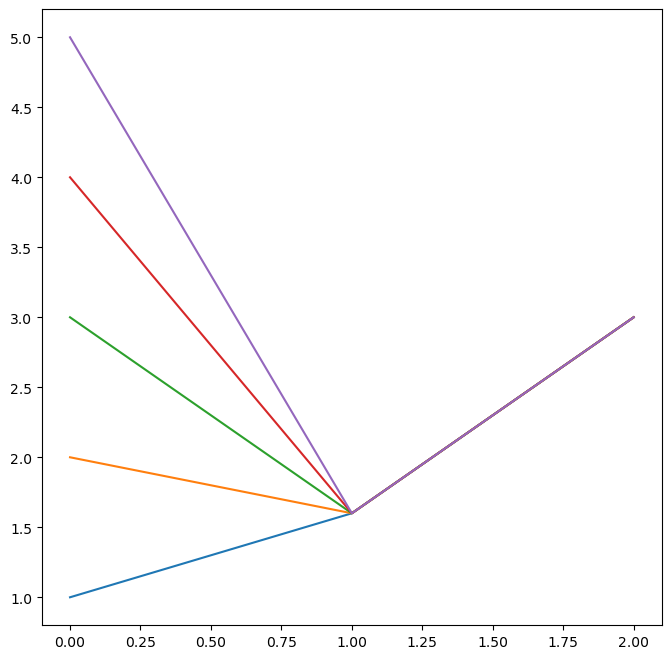

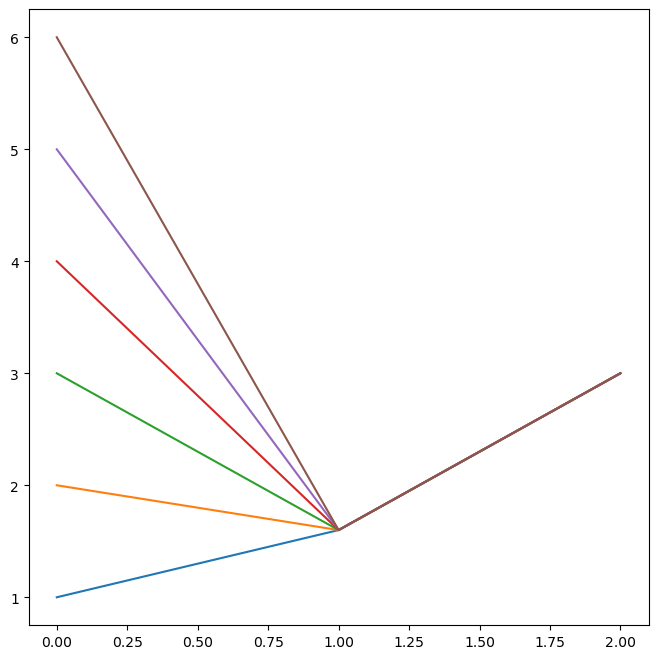

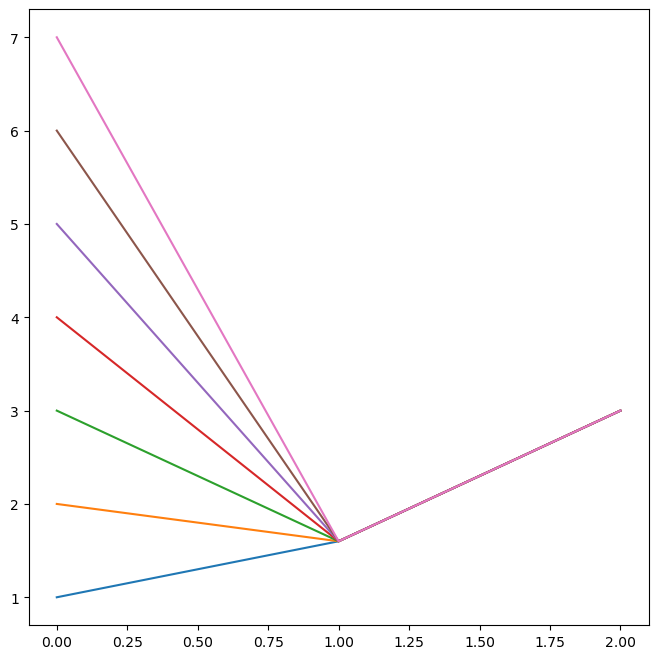

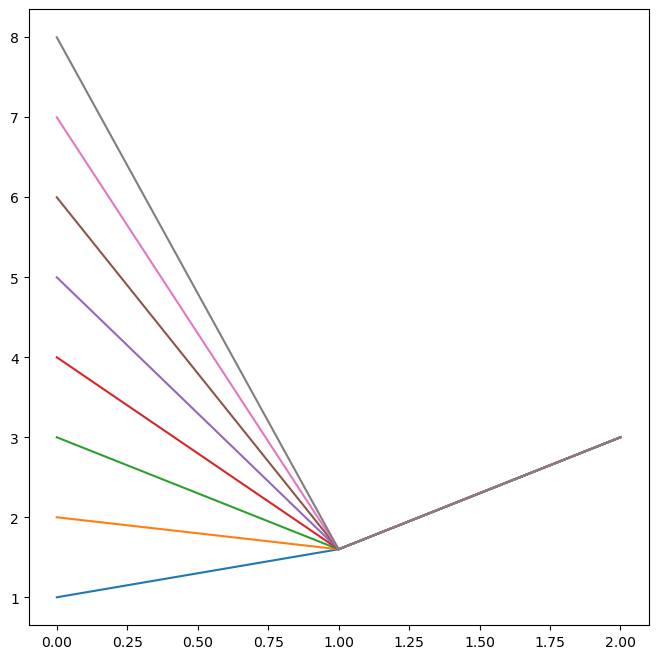

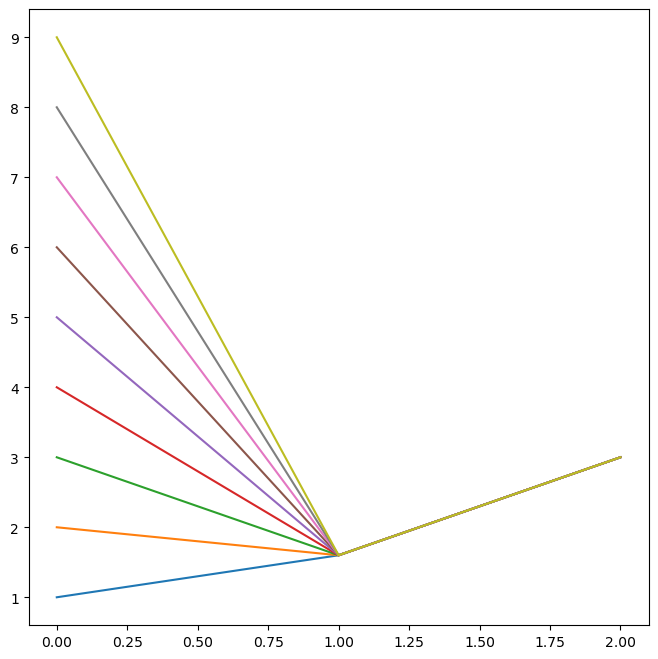

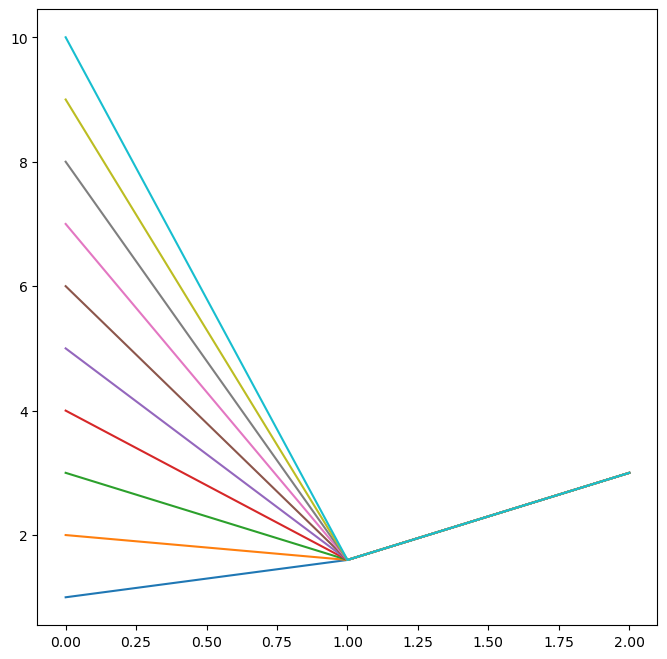

In [31]:
import matplotlib
plt.close('all') 
matplotlib.use('agg')
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 8)) 
for i in np.arange(10):
    ax.plot([1+i,1.6,3])
    %matplotlib qt
    display(fig)
    time.sleep(1)
    





In [15]:
%matplotlib qt
plt.plot( Thetahat)
plt.axhline(y=theta, color='r')
plt.title(f"Theta={theta} Number obs={N}")
plt.xlabel("Number of bootstrap repetitions")
plt.ylim(theta * 0.95, theta * 1.05)
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [6]:
plt.title(f"Theta={theta} Number obs={N}")

Text(0.5, 1.0, 'Theta=9.0 Number obs=1450')